<a href="https://colab.research.google.com/github/lamini-H/DeepLearningProjects/blob/main/Implementing_Neural_Net_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [17]:
X,y = sklearn.datasets.make_moons(n_samples=200,noise=0.15,random_state=0)


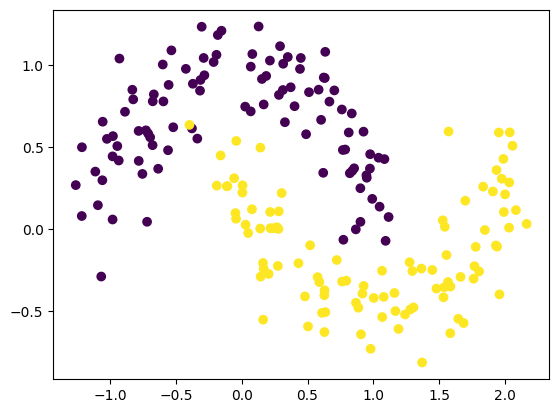

In [18]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [19]:
X.shape

(200, 2)

In [54]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lamba = 0.01

In [55]:
#Defining the model
model_dic = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

NameError: name 'W1' is not defined

In [47]:
def retrieve(model_dic):
  W1 = model_dic['W1']
  b1 = model_dic['b1']
  W2 = model_dic['W2']
  b2 = model_dic['b2']
  return W1,b1,W2,b2

In [48]:
def forward(X,model_dic):
  W1,b1,W2,b2 = retrieve(model_dic)
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  a2 = np.tanh(z2)
  exp_scores = np.exp(a2)
  softmax =  exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
  return z1, a1, softmax

In [60]:
def loss(softmax,y,model_dic):
  W1,b1,W2,b2 = retrieve(model_dic)
  m = np.zeros(200)
  for i,correct_index in enumerate(y):
    predicted = softmax[i][correct_index]
    m[i] = predicted
  log_prob = -np.log(predicted)
  loss = np.sum(log_prob)
  reg_loss = (lamba/(2)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  loss += reg_loss
  return float(loss / y.shape[0])

In [50]:
def predict(X,model_dic):
  W1,b1,W2,b2 = retrieve(model_dic)
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  a2 = np.tanh(z2)
  exp_scores = np.exp(a2)
  softmax =  exp_scores / np.sum(exp_scores,axis=1,keepdims=True)
  return np.argmax(softmax,axis=1)

In [51]:
def backpropagation(X,y,model_dic,epochs):
  for i in range(epochs):
    W1,b1,W2,b2 = retrieve(model_dic)
    z1,a1,probs = forward(X,model_dic)
    delta3 = np.copy(probs)
    delta3[range(X.shape[0]),y] -= 1 #(200,2) delta3 = probs-1
    dw2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3,axis=0,keepdims=True) #(1,2)
    delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1),2))
    dw1 = np.dot(X.T,delta2)
    db1 = np.sum(delta2,axis=0)
    #Add regularization terms
    dw2 += lamba * np.sum(W2)
    dw1 += lamba * np.sum(W1)
    #Update weights
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    #Update the model dictionary
    model_dic = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    #Print the loss every 50 epoch
    if i % 50 == 0:
      print("Loss after iteration %i: %f" %(i,loss(probs,model_dic)))
  return model_dic

In [52]:
def init_network(input_dim, hidden_dim, output_dim):
  model = {}
  W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
  b1 = np.random.randn(1,hidden_dim)
  W2 = np.random.randn(hidden_dim,output_dim) / np.sqrt(hidden_dim)
  b2 = np.zeros((1,output_dim))
  model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
  return model

In [61]:
model_dic = init_network(input_neurons,3,output_neurons)
model = backpropagation(X,y,model_dic,1500)

Loss after iteration 0: 0.002531
Loss after iteration 50: 0.001332
Loss after iteration 100: 0.001425
Loss after iteration 150: 0.001616
Loss after iteration 200: 0.001848
Loss after iteration 250: 0.002126
Loss after iteration 300: 0.002460
Loss after iteration 350: 0.002855
Loss after iteration 400: 0.003318
Loss after iteration 450: 0.003855
Loss after iteration 500: 0.004470
Loss after iteration 550: 0.005166
Loss after iteration 600: 0.005947
Loss after iteration 650: 0.006814
Loss after iteration 700: 0.007770
Loss after iteration 750: 0.008818
Loss after iteration 800: 0.009964
Loss after iteration 850: 0.011211
Loss after iteration 900: 0.012562
Loss after iteration 950: 0.014019
Loss after iteration 1000: 0.015583
Loss after iteration 1050: 0.017253
Loss after iteration 1100: 0.019030
Loss after iteration 1150: 0.020913
Loss after iteration 1200: 0.022903
Loss after iteration 1250: 0.025002
Loss after iteration 1300: 0.027212
Loss after iteration 1350: 0.029539
Loss after iter